In [32]:
#assuming the default language for a notebook was set to Python

print("I'm running Python!")

I'm running Python!


Azure Databricks offre un service analytique basé sur Spark rapide, simple et collaboratif. Il est utilisé pour accélérer l’analyse du Big Data, l’intelligence artificielle, les lacs de données performants, la science des données interactive, le Machine Learning et la collaboration.

1. Le cluster : un ensemble de ressources de calcul sur lesquelles nous exécutons le code.
2. L’espace de travail : regroupe tous les éléments de Databricks, les clusters, les notebooks et les données.
3. Le notebook : un document contenant du code exécutable, du texte descriptif et des visualisations.

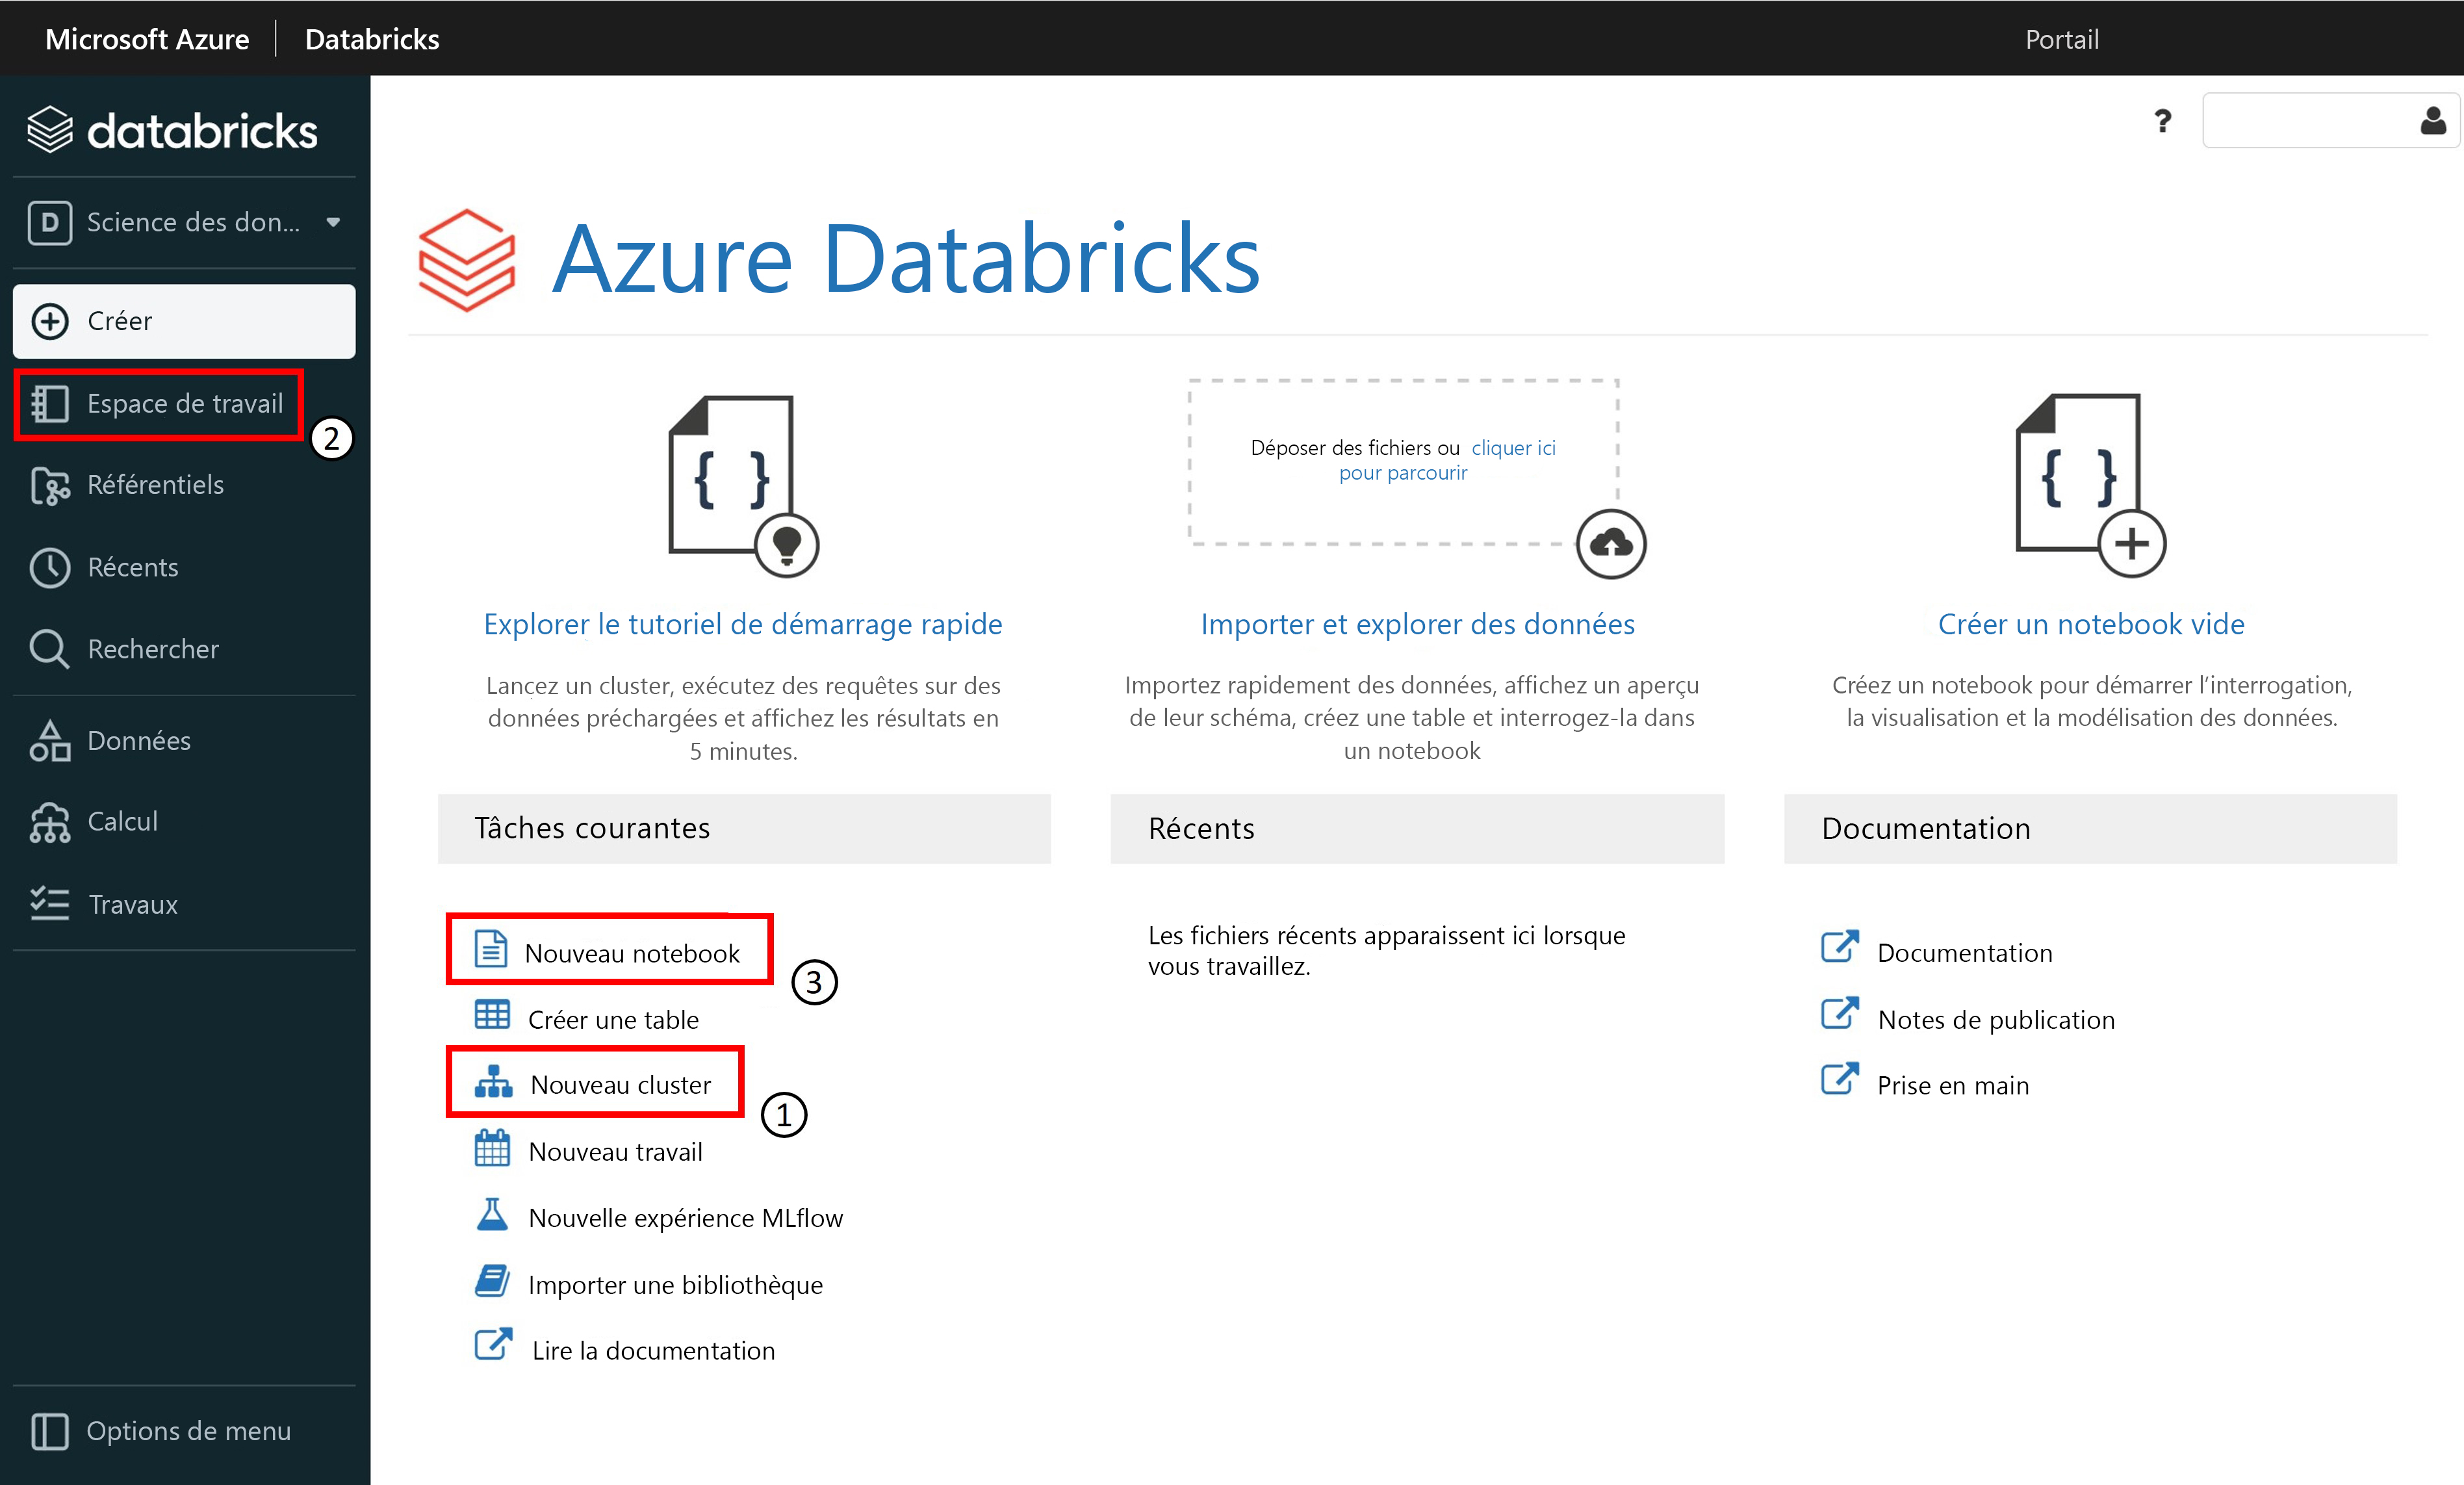

![Spark Logo Tiny](https://files.training.databricks.com/images/wiki-book/general/logo_spark_tiny.png) Databricks File System - DBFS

We've already imported data into Databricks by uploading our files.

Databricks is capable of mounting external/remote datasources as well.

DBFS allows you to mount storage objects so that you can seamlessly access data without requiring credentials.
Allows you to interact with object storage using directory and file semantics instead of storage URLs.
Persists files to object storage, so you won’t lose data after you terminate a cluster.

* DBFS is a layer over a cloud-based object store
* Files in DBFS are persisted to the object store
* The lifetime of files in the DBFS are **NOT** tied to the lifetime of our cluster

See also <a href="https://docs.azuredatabricks.net/user-guide/dbfs-databricks-file-system.html" target="_blank">Databricks File System - DBFS</a>.

In [31]:
#convert celsius to fahrenheit
def celsiusToFahrenheit(source_temp=None):
    return(source_temp * (9.0/5.0)) + 32.0    
        
#input values - celsius
a = [1, 2, 3, 4, 5]
print(a)

#convert all
b = map(lambda x: celsiusToFahrenheit(x), a)
print(list(b))

[1, 2, 3, 4, 5]
[33.8, 35.6, 37.4, 39.2, 41.0]


### Databricks Utilities - dbutils
* You can access the DBFS through the Databricks Utilities class (and other file IO routines).
* An instance of DBUtils is already declared for us as `dbutils`.

In [11]:
import findspark
findspark.init('/Users/awf/notebook/spark-3.3.1-bin-hadoop3')

In [14]:
#!pip install spark

In [22]:
import spark

import pyspark
from pyspark.sql import SparkSession

appName = "Spark - azure databricks"
master = "local"

# Create Spark session
spark = SparkSession.builder \
    .appName(appName) \
    .master(master) \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/08 22:26:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [23]:
import numpy as np
import pandas as pd


## Load the training data

In this notebook, we will be using a subset of NYC Taxi & Limousine Commission - green taxi trip records available from [Azure Open Datasets]( https://azure.microsoft.com/en-us/services/open-datasets/). The data is enriched with holiday and weather data. Each row of the table represents a taxi ride that includes columns such as number of passengers, trip distance, datetime information, holiday and weather information, and the taxi fare for the trip.

Run the following cell to load the table into a Spark dataframe and reivew the dataframe.

In [ ]:
# File location and type
file_location = "https://raw.githubusercontent.com/MicrosoftLearning/dp-090-databricks-ml/master/data/nyc-taxi.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

In [33]:
spark_df = spark.read.csv('nyc-taxi.csv', inferSchema=True, header=True)

#### DataFrame structure

To get information about the schema associated with our dataframe we can use `printSchema`:

In [36]:
spark_df.printSchema()

root
 |-- passengerCount: double (nullable = true)
 |-- tripDistance: double (nullable = true)
 |-- hour_of_day: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- month_num: integer (nullable = true)
 |-- normalizeHolidayName: string (nullable = true)
 |-- isPaidTimeOff: boolean (nullable = true)
 |-- snowDepth: double (nullable = true)
 |-- precipTime: double (nullable = true)
 |-- precipDepth: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- totalAmount: double (nullable = true)




#### DataFrame size

Use `count` to determine how many rows of data we have in a dataframe.

In [61]:
spark_df.count()

11734

### show(..) vs display(..)
* `show(..)` is part of core spark - `display(..)` is specific to our notebooks.
* `show(..)` has parameters for truncating both columns and rows - `display(..)` does not.
* `show(..)` is a function of the `DataFrame`/`Dataset` class - `display(..)` works with a number of different objects.
* `display(..)` is more powerful - with it, you can...
  * Download the results as CSV
  * Render line charts, bar chart & other graphs, maps and more.
  * See up to 1000 records at a time.
  
For the most part, the difference between the two is going to come down to preference.

Remember, the `display` function is Databricks specific. It is not available in standard spark code.

In [40]:
spark_df.show(1)

+--------------+------------+-----------+-----------+---------+--------------------+-------------+------------------+----------+-----------+----------------+-----------+
|passengerCount|tripDistance|hour_of_day|day_of_week|month_num|normalizeHolidayName|isPaidTimeOff|         snowDepth|precipTime|precipDepth|     temperature|totalAmount|
+--------------+------------+-----------+-----------+---------+--------------------+-------------+------------------+----------+-----------+----------------+-----------+
|           1.0|         9.4|         15|          2|        1|                None|        false|29.058823529411764|      24.0|        3.0|6.18571428571429|       44.3|
+--------------+------------+-----------+-----------+---------+--------------------+-------------+------------------+----------+-----------+----------------+-----------+
only showing top 1 row



In [30]:
display(spark_df)

DataFrame[passengerCount: double, tripDistance: double, hour_of_day: int, day_of_week: int, month_num: int, normalizeHolidayName: string, isPaidTimeOff: boolean, snowDepth: double, precipTime: double, precipDepth: double, temperature: double, totalAmount: double]

In [ ]:
%sql

select * from "nyc-taxi.csv"

In [ ]:
df = spark.sql("SELECT * FROM nyc-taxi.csv")

display(df)

In [45]:
# Import file using pandas

#df = pd.read_csv("https://raw.githubusercontent.com/MicrosoftLearning/dp-090-databricks-ml/master/data/nyc-taxi.csv")

In [47]:
#df.head()

df = spark.read.csv('nyc-taxi.csv', inferSchema=True, header=True)

In [48]:
df.count()

11734

## Querying dataframes

Once that spark has the data, we can manipulate it using spark SQL API.

We can easily use the spark SQL dsl to do joins, aggregations, filtering. 
We can change the data structure, add or drop columns, or change the column types.

We will use the python function we've already defined to convert Celsius degrees to Fahrenheit degrees.

In [50]:
def celsiusToFahrenheit(source_temp=None):
    return(source_temp * (9.0/5.0)) + 32.0
  
celsiusToFahrenheit(27)

80.6

We will adapt it as a udf (user defined function) to make it usable with Spark's dataframes API.

And we will use it to enrich our source data.

In [64]:
from pyspark.sql.functions import isnan, when, count, col, udf
from pyspark.sql.types import *

udfCelsiusToFahrenheit = udf(lambda z: celsiusToFahrenheit(z), DoubleType())

filtering_df = df.filter(col('temperature').isNotNull()) \
  .withColumn("tempC", col("temperature").cast(DoubleType())) \
  .select(col("tempC"), udfCelsiusToFahrenheit(col("tempC")).alias("tempF"))

In [65]:
filtering_df.show()

+--------------------+------------------+
|               tempC|             tempF|
+--------------------+------------------+
|    6.18571428571429|43.134285714285724|
|   4.571929824561403|40.229473684210525|
|   4.384090909090913| 39.89136363636364|
|    6.18571428571429|43.134285714285724|
|   3.846428571428569| 38.92357142857142|
|  0.1594594594594597| 32.28702702702703|
|  -2.999107142857142|26.601607142857144|
|   4.384090909090913| 39.89136363636364|
|  -5.393749999999998|22.291250000000005|
|  10.943654822335034| 51.69857868020306|
|-0.04000000000000...|            31.928|
| -2.3351145038167944| 27.79679389312977|
|    6.18571428571429|43.134285714285724|
| -1.9500000000000008|             28.49|
|   5.197345132743359| 41.35522123893804|
|   3.846428571428569| 38.92357142857142|
|  3.3651785714285696| 38.05732142857143|
|            -2.06875|          28.27625|
| -1.9500000000000008|             28.49|
|            -2.06875|          28.27625|
+--------------------+------------

More complex SQL functions are available in spark: 

* grouping, sorting, limits, count
* aggregations: agg, max, sum
* windowing: partitionBy, count over, max over

For example may want to add a row-number column to our source data. Window functions will help with such complex queries:

In [67]:
from pyspark.sql.window import Window
from pyspark.sql.functions import desc, row_number, monotonically_increasing_id

df.orderBy('tripDistance', ascending=False) \
  .withColumn('rowno', row_number().over(Window.orderBy(monotonically_increasing_id()))).show()


23/01/08 22:51:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/08 22:51:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/08 22:51:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/08 22:51:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/08 22:51:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/08 22:51:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
+---------

#### Data cleaning

Before using the source data, we have to validate the contents. Let's see if there are any duplicates:

In [68]:
df.count() - df.dropDuplicates().count()

4

In [70]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+--------------+------------+-----------+-----------+---------+--------------------+-------------+---------+----------+-----------+-----------+-----------+
|passengerCount|tripDistance|hour_of_day|day_of_week|month_num|normalizeHolidayName|isPaidTimeOff|snowDepth|precipTime|precipDepth|temperature|totalAmount|
+--------------+------------+-----------+-----------+---------+--------------------+-------------+---------+----------+-----------+-----------+-----------+
|           587|           0|          0|          0|        0|                   0|            0|        0|         0|          0|          0|        117|
+--------------+------------+-----------+-----------+---------+--------------------+-------------+---------+----------+-----------+-----------+-----------+



Since some of our columns seem to have such null values, we'll have to fix these rows.

We could either replace null values using `fillna` or ignore such rows using `dropna`

In [71]:
df = df.fillna({'passengerCount':'1'}).dropna()
display(df)

DataFrame[passengerCount: double, tripDistance: double, hour_of_day: int, day_of_week: int, month_num: int, normalizeHolidayName: string, isPaidTimeOff: boolean, snowDepth: double, precipTime: double, precipDepth: double, temperature: double, totalAmount: double]

In [73]:
df.show()

+--------------+------------+-----------+-----------+---------+--------------------+-------------+------------------+----------+-----------+--------------------+-----------+
|passengerCount|tripDistance|hour_of_day|day_of_week|month_num|normalizeHolidayName|isPaidTimeOff|         snowDepth|precipTime|precipDepth|         temperature|totalAmount|
+--------------+------------+-----------+-----------+---------+--------------------+-------------+------------------+----------+-----------+--------------------+-----------+
|           1.0|         9.4|         15|          2|        1|                None|        false|29.058823529411764|      24.0|        3.0|    6.18571428571429|       44.3|
|           1.0|       14.75|         13|          4|        1|                None|        false|               0.0|       6.0|        0.0|   4.571929824561403|       44.8|
|           1.0|        3.35|         23|          4|        1|                None|        false|               0.0|       1.0|  

In [75]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+-------------------+------------------+
|summary|    passengerCount|      tripDistance|       hour_of_day|       day_of_week|        month_num|normalizeHolidayName|        snowDepth|        precipTime|       precipDepth|        temperature|       totalAmount|
+-------+------------------+------------------+------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+-------------------+------------------+
|  count|             11617|             11617|             11617|             11617|            11617|               11617|            11617|             11617|             11617|              11617|             11617|
|   mean|  1.32994749074632|  2.86314539037617|13.634242919858828|3.2207971076870106|3.503055866402686|                n

## Visualizing data

Azure Databricks has custom support for displaying data. 

The `display(..)` command has multiple capabilities:
* Presents up to 1000 records.
* Exporting data as CSV.
* Rendering a multitude of different graphs.
* Rendering geo-located data on a world map.

Let's take a look at our data using databricks visualizations:

Run the cell below
click on the second icon underneath the executed cell and choose Bar
click on the Plot Options button to configure the graph
drag the tripDistance into the Keys list
drag the totalAmount into the Values list
choose Aggregation as AVG
click Apply

In [78]:
dfClean = df.select(col("tripDistance"), col("totalAmount")).dropna()

dfClean.show()

+------------+-----------+
|tripDistance|totalAmount|
+------------+-----------+
|         9.4|       44.3|
|       14.75|       44.8|
|        3.35|      18.96|
|        3.33|       16.3|
|        0.47|        5.3|
|        3.07|       16.3|
|        0.92|       8.97|
|         1.9|       11.8|
|        0.77|        7.3|
|        2.35|      14.16|
|         8.3|       34.3|
|        4.28|      18.96|
|       10.77|       31.3|
|        1.75|       14.3|
|        3.75|       19.3|
|        5.79|      33.55|
|        1.06|        8.3|
|         5.7|       29.1|
|        3.26|      23.34|
|        2.68|       10.3|
+------------+-----------+
only showing top 20 rows




Note that the points form a diagonal line, which indicates a strong linear relationship between the trip distance and the total amount. This linear relationship shows a correlation between these two values, which we can measure statistically. 

The `corr` function calculates a correlation value between -1 and 1, indicating the strength of correlation between two fields. A strong positive correlation (near 1) indicates that high values for one column are often found with high values for the other, which a strong negative correlation (near -1) indicates that low values for one column are often found with high values for the other. A correlation near 0 indicates little apparent relationship between the fields.

In [79]:
dfClean.corr('tripDistance', 'totalAmount')

0.9124610104806419

Predictive modeling is largely based on statistical relationships between fields in the data. To design a good model, you need to understand how the data points relate to one another.

A common way to start exploring relationships is to create visualizations that compare two or more data values. For example, modify the Plot Options of the chart above to compare the arrival delays for each carrier:

* Keys: temperature
* Series Groupings: month_num
* Values: snowDeprh
* Aggregation: avg
* Display Type: Line Chart

# Featurization

Cleaning data and adding features creates the inputs for machine learning models, which are only as strong as the data they are fed.  This notebook examines the process of featurization including common tasks such as:

- Exercise 1: Handling missing data
- Exercise 2: Feature Engineering
- Exercise 3: Scaling Numeric features
- Exercise 4: Encoding Categorical Features

In [80]:
import urllib.request
import os
import numpy as np
from pyspark.sql.types import * 
from pyspark.sql.functions import col, lit
from pyspark.sql.functions import udf
print("Imported common libraries.")

Imported common libraries.


## Exercise 1: Handling missing data

Null values refer to unknown or missing data as well as irrelevant responses. Strategies for dealing with this scenario include:
* **Dropping these records:** Works when you do not need to use the information for downstream workloads
* **Adding a placeholder (e.g. `-1`):** Allows you to see missing data later on without violating a schema
* **Basic imputing:** Allows you to have a "best guess" of what the data could have been, often by using the mean of non-missing data
* **Advanced imputing:** Determines the "best guess" of what data should be using more advanced strategies such as clustering machine learning algorithms or oversampling techniques <a href="https://jair.org/index.php/jair/article/view/10302" target="_blank">such as SMOTE.</a>

A common option for working with missing data is to impute the missing values with a best guess for their value. We will try imputing the `passenger count` column with its median value. Run the following cell to create the **Imputer** with **strategy="median"** and impute the `passenger count` column.

In [82]:
dataset = spark.read.csv('nyc-taxi.csv', inferSchema=True, header=True)

In [83]:
from pyspark.ml.feature import Imputer

inputCols = ["passengerCount"]
outputCols = ["passengerCount"]

imputer = Imputer(strategy="median", inputCols=inputCols, outputCols=outputCols)
imputerModel = imputer.fit(dataset)
imputedDF = imputerModel.transform(dataset)
display(imputedDF)

DataFrame[passengerCount: double, tripDistance: double, hour_of_day: int, day_of_week: int, month_num: int, normalizeHolidayName: string, isPaidTimeOff: boolean, snowDepth: double, precipTime: double, precipDepth: double, temperature: double, totalAmount: double]

In [85]:
imputedDF.show(5)

+--------------+------------+-----------+-----------+---------+--------------------+-------------+------------------+----------+-----------+-----------------+-----------+
|passengerCount|tripDistance|hour_of_day|day_of_week|month_num|normalizeHolidayName|isPaidTimeOff|         snowDepth|precipTime|precipDepth|      temperature|totalAmount|
+--------------+------------+-----------+-----------+---------+--------------------+-------------+------------------+----------+-----------+-----------------+-----------+
|           1.0|         9.4|         15|          2|        1|                None|        false|29.058823529411764|      24.0|        3.0| 6.18571428571429|       44.3|
|           1.0|       14.75|         13|          4|        1|                None|        false|               0.0|       6.0|        0.0|4.571929824561403|       44.8|
|           1.0|        3.35|         23|          4|        1|                None|        false|               0.0|       1.0|        0.0|4.384

In the next, lesson we will train a machine learning model to predict the taxi fares, thus the `totalAmount` column will be the target column for training the machine learning model. Given the importance of this column, the strategy to deal with `totalAmount` column will be to drop the rows with null values in that column. Run the following cell to drop the null rows and review the final imputed dataset.

In [86]:
imputedDF = imputedDF.na.drop(subset=["totalAmount"])

display(imputedDF.describe())

DataFrame[summary: string, passengerCount: string, tripDistance: string, hour_of_day: string, day_of_week: string, month_num: string, normalizeHolidayName: string, snowDepth: string, precipTime: string, precipDepth: string, temperature: string, totalAmount: string]

In [87]:
imputedDF.show()

+--------------+------------+-----------+-----------+---------+--------------------+-------------+------------------+----------+-----------+--------------------+-----------+
|passengerCount|tripDistance|hour_of_day|day_of_week|month_num|normalizeHolidayName|isPaidTimeOff|         snowDepth|precipTime|precipDepth|         temperature|totalAmount|
+--------------+------------+-----------+-----------+---------+--------------------+-------------+------------------+----------+-----------+--------------------+-----------+
|           1.0|         9.4|         15|          2|        1|                None|        false|29.058823529411764|      24.0|        3.0|    6.18571428571429|       44.3|
|           1.0|       14.75|         13|          4|        1|                None|        false|               0.0|       6.0|        0.0|   4.571929824561403|       44.8|
|           1.0|        3.35|         23|          4|        1|                None|        false|               0.0|       1.0|  

## Exercise 2: Feature Engineering

In some situations, it is beneficial to engineer new features or columns from existing data. In this case, the `hour_of_day` column represents hours from 0 – 23. Given that time is cyclical in nature, for example hour 23 is very close hour 0. Thus, it can be useful to transform the ` hour_of_day ` column as **sine** and **cosine** functions that are inherently cyclical in nature. Run the following cell to setup an user defined function (UDF) that will take in the ` hour_of_day ` column and transforms the column to its sine and cosine representation.

In [88]:
def get_sin_cosine(value, max_value):
  sine =  np.sin(value * (2.*np.pi/max_value))
  cosine = np.cos(value * (2.*np.pi/max_value))
  return (sine.tolist(), cosine.tolist())

schema = StructType([
    StructField("sine", DoubleType(), False),
    StructField("cosine", DoubleType(), False)
])

get_sin_cosineUDF = udf(get_sin_cosine, schema)

print("UDF get_sin_cosineUDF defined.")

UDF get_sin_cosineUDF defined.


Run the following cell to do the ` hour_of_day `  column transformation and name the two new columns as `hour_sine` and `hour_cosine` and drop the original column. To review the resulting dataframe, scroll to the right to observe the two new columns.

In [89]:
engineeredDF = imputedDF.withColumn("udfResult", get_sin_cosineUDF(col("hour_of_day"), lit(24))).withColumn("hour_sine", col("udfResult.sine")).withColumn("hour_cosine", col("udfResult.cosine")).drop("udfResult").drop("hour_of_day")
display(engineeredDF)

DataFrame[passengerCount: double, tripDistance: double, day_of_week: int, month_num: int, normalizeHolidayName: string, isPaidTimeOff: boolean, snowDepth: double, precipTime: double, precipDepth: double, temperature: double, totalAmount: double, hour_sine: double, hour_cosine: double]

In [90]:
engineeredDF.show()

+--------------+------------+-----------+---------+--------------------+-------------+------------------+----------+-----------+--------------------+-----------+--------------------+--------------------+
|passengerCount|tripDistance|day_of_week|month_num|normalizeHolidayName|isPaidTimeOff|         snowDepth|precipTime|precipDepth|         temperature|totalAmount|           hour_sine|         hour_cosine|
+--------------+------------+-----------+---------+--------------------+-------------+------------------+----------+-----------+--------------------+-----------+--------------------+--------------------+
|           1.0|         9.4|          2|        1|                None|        false|29.058823529411764|      24.0|        3.0|    6.18571428571429|       44.3| -0.7071067811865471| -0.7071067811865479|
|           1.0|       14.75|          4|        1|                None|        false|               0.0|       6.0|        0.0|   4.571929824561403|       44.8|-0.25881904510252035| -

## Exercise 3: Scaling Numeric features

Common types of data in machine learning include:
- Numerical
  - Numerical values, either integers or floats
  - Example, predict house prices
- Categorical
  - Discrete and limited set of values
  - The values typically do not make sense unless there is a meaning or a category attached to the values
  - Example, persons gender or ethnicity
- Time-Series
  - Data series over time
  - Typically, data collected over equally spaced points in time
  - Example, real-time stock performance
- Text
  - Words or sentences
  - Example, news articles
  
In the example we are working with, we have **numerical** and **categorical** features. Run the following cell to create list of numerical and categorical features in the dataset. In this exercise, we will look at how to work with numerical features and in the next exercise we will look at encoding categorical features.

In [91]:
numerical_cols = ["passengerCount", "tripDistance", "snowDepth", "precipTime", "precipDepth", "temperature", "hour_sine", "hour_cosine"]
categorical_cols = ["day_of_week", "month_num", "normalizeHolidayName", "isPaidTimeOff"]
label_column = "totalAmount"
print("Numerical and categorical features list defined. Label column identified.")

Numerical and categorical features list defined. Label column identified.


For numerical features the ranges of values can vary widely and thus it is common practice in machine learning to scale the numerical features. The two common approaches for data scaling are:
- **Normalization**: Rescales the data into the range [0, 1].
- **Standardization**: Rescales the data to have Mean = 0 and Variance = 1.

Run the following cell to see how to use the **VectorAssembler**  and **MinMaxScaler** to scale the numerical features into the range of [0,1]. Observe how we combine the two-step transformation into a single pipeline. Finally, review the resulting dataframe by scrolling to right to observe the new assembled and scaled column: **scaled_numerical_features**.

In [92]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml import Pipeline


assembler = VectorAssembler().setInputCols(numerical_cols).setOutputCol('numerical_features')
scaler = MinMaxScaler(inputCol=assembler.getOutputCol(), outputCol="scaled_numerical_features")

partialPipeline = Pipeline().setStages([assembler, scaler])
pipelineModel = partialPipeline.fit(engineeredDF)
scaledDF = pipelineModel.transform(engineeredDF)

display(scaledDF)

DataFrame[passengerCount: double, tripDistance: double, day_of_week: int, month_num: int, normalizeHolidayName: string, isPaidTimeOff: boolean, snowDepth: double, precipTime: double, precipDepth: double, temperature: double, totalAmount: double, hour_sine: double, hour_cosine: double, numerical_features: vector, scaled_numerical_features: vector]

In [94]:
scaledDF.show(2)

+--------------+------------+-----------+---------+--------------------+-------------+------------------+----------+-----------+-----------------+-----------+--------------------+-------------------+--------------------+-------------------------+
|passengerCount|tripDistance|day_of_week|month_num|normalizeHolidayName|isPaidTimeOff|         snowDepth|precipTime|precipDepth|      temperature|totalAmount|           hour_sine|        hour_cosine|  numerical_features|scaled_numerical_features|
+--------------+------------+-----------+---------+--------------------+-------------+------------------+----------+-----------+-----------------+-----------+--------------------+-------------------+--------------------+-------------------------+
|           1.0|         9.4|          2|        1|                None|        false|29.058823529411764|      24.0|        3.0| 6.18571428571429|       44.3| -0.7071067811865471|-0.7071067811865479|[1.0,9.4,29.05882...|     [0.0,0.1501439078...|
|           

## Exercise 4: Encoding Categorical Features

It is important to note that in machine learning, we ultimately always work with numbers or specifically, vectors. In this context, a vector is either an array of numbers or nested arrays of arrays of numbers. All non-numeric data types, such as categories, like `normalizeHolidayName`, `isPaidTimeOff` in the dataframe are eventually represented as numbers. Also, for numerical categories, such as `day_of_week` and `month_num`, it is important to encode them. Otherwise, machine learning model might assume that month 6 (June) is six times as much as the month 1 (January).

**One Hot Encoding** is often the recommended approach to encode categorical features. In this approach, for each categorical column, a number of N new columns are added to the data set, where N is the cardinality (the number of distinct values) of the column. Each column corresponds to one of the categories and will have a value of 0 if the row has that category or 1 if it hasn’t.

Run the following cell to encode the categorical features in the dataset using One Hot encoding. Since, **OneHotEncoder** only operates on numerical values, we will first use **StringIndexer** to index the categorical columns to a numerical value and the then encode using the **OneHotEncoder**.

In [96]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

stages = [] # stages in our Pipeline
for categorical_col in categorical_cols:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categorical_col, outputCol=categorical_col + "_index", handleInvalid="skip")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categorical_col + "_classVector"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]

encodedDF = scaledDF.withColumn("isPaidTimeOff", col("isPaidTimeOff").cast("integer"))
partialPipeline = Pipeline().setStages(stages)
pipelineModel = partialPipeline.fit(encodedDF)
encodedDF = pipelineModel.transform(encodedDF)


In the resulting dataframe, observe the new column **isPaidTimeOff_classVector** is a vector. The difference between a sparse and dense vector is whether Spark records all of the empty values. In a sparse vector, like we see here, Spark saves space by only recording the places where the vector has a non-zero value. The value of 0 in the first position indicates that it's a sparse vector. The second value indicates the length of the vector.

Example interpretation of the following vector: **[0, 1, [0], [1]]**
- 0 - it’s a sparse vector
- 1 – length of the vector is 1
- [0] – in this case the values only present in the 0th position of the vector
- [1] – values in the corresponding positions


# Training and Validating a Machine Learning Model

Linear regression is the most commonly employed machine learning model since it is highly interpretable and well studied.  This is often the first pass for data scientists modeling continuous variables.  This notebook trains a multivariate regression model and interprets the results. This notebook is organized in two sections:

- Exercise 1: Training a Model
- Exercise 2: Validating a Model

In [97]:
import urllib.request
import os
import numpy as np
from pyspark.sql.types import * 
from pyspark.sql.functions import col, lit
from pyspark.sql.functions import udf
import matplotlib
import matplotlib.pyplot as plt
print("Imported common libraries.")

Imported common libraries.


## Exercise 1: Training a Model

In this section we will use the Spark's machine learning library, `MLlib` to train a `NYC Taxi Fare Predictor` machine learning model. We will train a multivariate regression model to predict taxi fares in New York City based on input features such as, number of passengers, trip distance, datetime, holiday information and weather information. Before we start, let's review the three main abstractions that are provided in the `MLlib`:<br><br>

1. A **transformer** takes a DataFrame as an input and returns a new DataFrame with one or more columns appended to it.  
  - Transformers implement a `.transform()` method.  
2. An **estimator** takes a DataFrame as an input and returns a model, which itself is a transformer.
  - Estimators implements a `.fit()` method.
3. A **pipeline** combines together transformers and estimators to make it easier to combine multiple algorithms.
  - Pipelines implement a `.fit()` method.
  
These basic building blocks form the machine learning process in Spark from featurization through model training and deployment.  

### Featurization of the training data

Machine learning models are only as strong as the data they see and can only work on numerical data.  **Featurization is the process of creating this input data for a model.** In this section we will build derived features and create a pipeline of featurization steps.

Run the following cell to engineer the cyclical features to represent `hour_of_day`. Also, we will drop rows with null values in the `totalAmount` column and convert the column ` isPaidTimeOff ` as integer type.

In [98]:
def get_sin_cosine(value, max_value):
  sine =  np.sin(value * (2.*np.pi/max_value))
  cosine = np.cos(value * (2.*np.pi/max_value))
  return (sine.tolist(), cosine.tolist())

schema = StructType([
    StructField("sine", DoubleType(), False),
    StructField("cosine", DoubleType(), False)
])

get_sin_cosineUDF = udf(get_sin_cosine, schema)

dataset = dataset.withColumn("udfResult", get_sin_cosineUDF(col("hour_of_day"), lit(24))).withColumn("hour_sine", col("udfResult.sine")).withColumn("hour_cosine", col("udfResult.cosine")).drop("udfResult").drop("hour_of_day")

dataset = dataset.filter(dataset.totalAmount.isNotNull())

dataset = dataset.withColumn("isPaidTimeOff", col("isPaidTimeOff").cast("integer"))

display(dataset)

DataFrame[passengerCount: double, tripDistance: double, day_of_week: int, month_num: int, normalizeHolidayName: string, isPaidTimeOff: int, snowDepth: double, precipTime: double, precipDepth: double, temperature: double, totalAmount: double, hour_sine: double, hour_cosine: double]

Run the following cell to create stages in our featurization pipeline to scale the numerical features and to encode the categorical features.

In [99]:
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline

numerical_cols = ["passengerCount", "tripDistance", "snowDepth", "precipTime", "precipDepth", "temperature", "hour_sine", "hour_cosine"]
categorical_cols = ["day_of_week", "month_num", "normalizeHolidayName", "isPaidTimeOff"]
label_column = "totalAmount"

stages = []

inputCols = ["passengerCount"]
outputCols = ["passengerCount"]
imputer = Imputer(strategy="median", inputCols=inputCols, outputCols=outputCols)
stages += [imputer]

assembler = VectorAssembler().setInputCols(numerical_cols).setOutputCol('numerical_features')
scaler = MinMaxScaler(inputCol=assembler.getOutputCol(), outputCol="scaled_numerical_features")
stages += [assembler, scaler]

for categorical_col in categorical_cols:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categorical_col, outputCol=categorical_col + "_index", handleInvalid="skip")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categorical_col + "_classVector"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]
    
print("Created stages in our featurization pipeline to scale the numerical features and to encode the categorical features.")

Created stages in our featurization pipeline to scale the numerical features and to encode the categorical features.


Use a `VectorAssembler` to combine all the feature columns into a single vector column named **features**.

In [100]:
assemblerInputs = [c + "_classVector" for c in categorical_cols] + ["scaled_numerical_features"]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
print("Used a VectorAssembler to combine all the feature columns into a single vector column named features.")

Used a VectorAssembler to combine all the feature columns into a single vector column named features.


**Run the stages as a Pipeline**

The pipeline is itself is now an `estimator`.  Call the pipeline's `fit` method and then `transform` the original dataset. This puts the data through all of the feature transformations we described in a single call. Observe the new columns, especially column: **features**.

In [101]:
partialPipeline = Pipeline().setStages(stages)
pipelineModel = partialPipeline.fit(dataset)
preppedDataDF = pipelineModel.transform(dataset)

display(preppedDataDF)

DataFrame[passengerCount: double, tripDistance: double, day_of_week: int, month_num: int, normalizeHolidayName: string, isPaidTimeOff: int, snowDepth: double, precipTime: double, precipDepth: double, temperature: double, totalAmount: double, hour_sine: double, hour_cosine: double, numerical_features: vector, scaled_numerical_features: vector, day_of_week_index: double, day_of_week_classVector: vector, month_num_index: double, month_num_classVector: vector, normalizeHolidayName_index: double, normalizeHolidayName_classVector: vector, isPaidTimeOff_index: double, isPaidTimeOff_classVector: vector, features: vector]

### Train a multivariate regression model

A multivariate regression takes an arbitrary number of input features. The equation for multivariate regression looks like the following where each feature `p` has its own coefficient:

&nbsp;&nbsp;&nbsp;&nbsp;`Y ≈ β<sub>0</sub> + β<sub>1</sub>X<sub>1</sub> + β<sub>2</sub>X<sub>2</sub> + ... + β<sub>p</sub>X<sub>p</sub>`

Split the featurized training data for training and validating the model

In [102]:
(trainingData, testData) = preppedDataDF.randomSplit([0.7, 0.3], seed=97)
print("The training data is split for training and validating the model: 70-30 split.")

The training data is split for training and validating the model: 70-30 split.


Create the estimator `LinearRegression` and call its `fit` method to get back the trained ML model (`lrModel`). You can read more about [Linear Regression] from the [classification and regression] section of MLlib Programming Guide.

[classification and regression]: https://spark.apache.org/docs/latest/ml-classification-regression.html
[Linear Regression]: https://spark.apache.org/docs/3.1.1/ml-classification-regression.html#linear-regression

In [103]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol=label_column)

lrModel = lr.fit(trainingData)

print(lrModel)

23/01/08 23:19:20 WARN Instrumentation: [2612b69c] regParam is zero, which might cause numerical instability and overfitting.


23/01/08 23:19:21 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
23/01/08 23:19:21 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/01/08 23:19:21 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/01/08 23:19:21 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


LinearRegressionModel: uid=LinearRegression_0a4c4a4427e9, numFeatures=24



## Exercise 2: Validating a Model

From the trained model summary, let’s review some of the model performance metrics such as, Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R<sup>2</sup> score. We will also look at the multivariate model’s coefficients. 

In [104]:
summary = lrModel.summary
print("RMSE score: {} \nMAE score: {} \nR2 score: {}".format(summary.rootMeanSquaredError, summary.meanAbsoluteError, lrModel.summary.r2))
print("")
print("β0 (intercept): {}".format(lrModel.intercept))
i = 0
for coef in lrModel.coefficients:
  i += 1
  print("β{} (coefficient): {}".format(i, coef))


RMSE score: 4.083166417623794 
MAE score: 2.161283918878106 
R2 score: 0.8583561705739742

β0 (intercept): 5.546846200787039
β1 (coefficient): 0.4082726335494935
β2 (coefficient): -0.3203472582145028
β3 (coefficient): -0.629935834971372
β4 (coefficient): 0.294788804509589
β5 (coefficient): 0.24112497254624887
β6 (coefficient): 0.3414059599852025
β7 (coefficient): -0.1026683618368603
β8 (coefficient): -0.08985172261425202
β9 (coefficient): -0.14499756031599267
β10 (coefficient): 0.09756576364493555
β11 (coefficient): -0.1008911290304535
β12 (coefficient): 0.41019782882789596
β13 (coefficient): -0.6559163926967875
β14 (coefficient): -1.4378172538146037
β15 (coefficient): -2.051295275675274
β16 (coefficient): -0.7013543448783203
β17 (coefficient): 0.25292335204718075
β18 (coefficient): 216.9094560052516
β19 (coefficient): 0.10502338757717541
β20 (coefficient): 0.15187161425122367
β21 (coefficient): -0.8702812506480657
β22 (coefficient): 0.6009422238228578
β23 (coefficient): -0.93475369712

Evaluate the model performance using the hold-back  dataset. Observe that the RMSE and R<sup>2</sup> score on holdback dataset is slightly degraded compared to the training summary. A big disparity in performance metrics between training and hold-back dataset can be an indication of model overfitting the training data.

In [105]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = lrModel.transform(testData)
evaluator = RegressionEvaluator(
    labelCol=label_column, predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
evaluator = RegressionEvaluator(
    labelCol=label_column, predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)
print("MAE on test data = %g" % mae)
evaluator = RegressionEvaluator(
    labelCol=label_column, predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R2 on test data = %g" % r2)

Root Mean Squared Error (RMSE) on test data = 5.18444


MAE on test data = 2.15868


R2 on test data = 0.786968


**Compare the summary statistics between the true values and the model predictions**£

In [107]:
predictions.select(["totalAmount",  "prediction"]).describe().show()

+-------+------------------+------------------+
|summary|       totalAmount|        prediction|
+-------+------------------+------------------+
|  count|              3480|              3480|
|   mean|14.897370689655352|14.819030458137803|
| stddev|11.234197496969816| 9.996372227102915|
|    min|               3.3| 3.757438171954438|
|    max|             200.0|102.49455247238514|
+-------+------------------+------------------+



**Visualize the plot between true values and the model predictions**

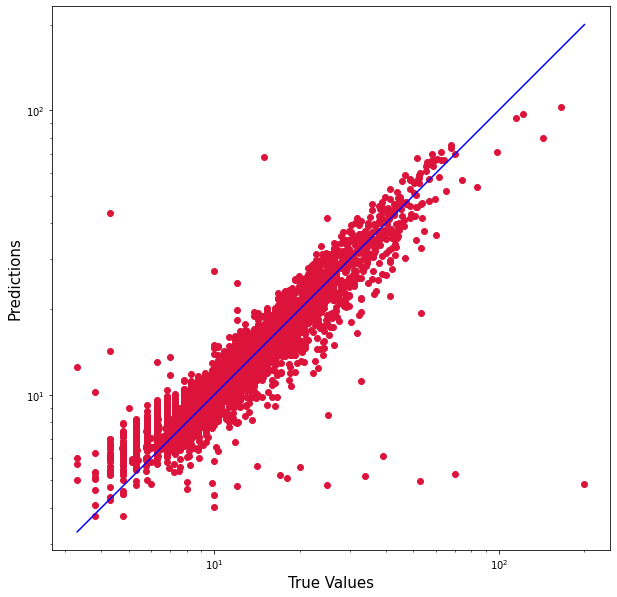

In [106]:
p_df = predictions.select(["totalAmount",  "prediction"]).toPandas()
true_value = p_df.totalAmount
predicted_value = p_df.prediction

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Using MLflow to Track Experiments

## Running an Experiment
In this exercise, you will use the `nyc-taxi` dataset that you created for lab 2 to train a model which predicts the total fare based on a subset of the NYC Taxi & Limousine Commission - green taxi trip records.  You will create a linear regression model as in the prior lab. In this notebook, a key difference is that you will train variants of this model, changing **hyperparameters** to try to achieve better performance.

You will also use MLflow to log the associated metrics, parameters, artifacts, and model for each attempt.  The goal of this process is to determine which hyperparameters work best for generating accurate predictions.  Keeping track of results on your own in a spreadsheet or text document is possible but inefficient.  It would be better to do this work as close to the model and training process as possible.  With MLflow, you can create **experiments** to do just that.  An experiment is a logical collection of **runs**.  Each run is a different attempt at training.  You can control the nature of these runs--in this experiment, you will try out a series of hyperparameters for the same algorithm and data and compare which fares best.  But that's not the only way you can use experiments.  For example, you could create an experiment and have each run of the experiment try out a different algorithm altogether, or create an experiment and have each run look at a different subset of data for training.

In [108]:
import urllib.request
import os
import warnings
import sys
import numpy as np
from pyspark.sql.types import * 
from pyspark.sql.functions import col, lit
from pyspark.sql.functions import udf
import matplotlib
import matplotlib.pyplot as plt
import mlflow
import mlflow.spark

print('Loaded libraries.')

Loaded libraries.


%md ### Featurize and Train the Model

As a starting point, perform the same featurization as in the exercises for lab 2.  The following code engineers a cyclical feature to represent `hour_of_day` and performs other data cleanup work.  From there, it builds a `VectorAssembler` to combine feature columns into a single vector column named **features**.  Finally, it transforms the data and provides us resulting training and test data sets, which we can use for training and validating a model.

In [ ]:
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline

def get_sin_cosine(value, max_value):
  sine =  np.sin(value * (2.*np.pi/max_value))
  cosine = np.cos(value * (2.*np.pi/max_value))
  return (sine.tolist(), cosine.tolist())

schema = StructType([
    StructField("sine", DoubleType(), False),
    StructField("cosine", DoubleType(), False)
])

get_sin_cosineUDF = udf(get_sin_cosine, schema)

dataset = dataset.withColumn("udfResult", get_sin_cosineUDF(col("hour_of_day"), lit(24))).withColumn("hour_sine", col("udfResult.sine")).withColumn("hour_cosine", col("udfResult.cosine")).drop("udfResult").drop("hour_of_day")

dataset = dataset.filter(dataset.totalAmount.isNotNull())

dataset = dataset.withColumn("isPaidTimeOff", col("isPaidTimeOff").cast("integer"))

numerical_cols = ["passengerCount", "tripDistance", "snowDepth", "precipTime", "precipDepth", "temperature", "hour_sine", "hour_cosine"]
categorical_cols = ["day_of_week", "month_num", "normalizeHolidayName", "isPaidTimeOff"]
label_column = "totalAmount"

stages = []

inputCols = ["passengerCount"]
outputCols = ["passengerCount"]
imputer = Imputer(strategy="median", inputCols=inputCols, outputCols=outputCols)
stages += [imputer]

assembler = VectorAssembler().setInputCols(numerical_cols).setOutputCol('numerical_features')
scaler = MinMaxScaler(inputCol=assembler.getOutputCol(), outputCol="scaled_numerical_features")
stages += [assembler, scaler]

for categorical_col in categorical_cols:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categorical_col, outputCol=categorical_col + "_index", handleInvalid="skip")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categorical_col + "_classVector"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]
    
assemblerInputs = [c + "_classVector" for c in categorical_cols] + ["scaled_numerical_features"]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

partialPipeline = Pipeline().setStages(stages)
pipelineModel = partialPipeline.fit(dataset)
preppedDataDF = pipelineModel.transform(dataset)

(trainingData, testData) = preppedDataDF.randomSplit([0.7, 0.3], seed=97)


print('Created datasets')

 ### Plot Regression Quality

This function will be useful for training, as it provides a visual overview of model performance.  Given a set of predictions, this function generates an image similar to the final image in Lab 2b, allowing us to see how well a particular model performs.

In [110]:
def plot_regression_quality(predictions):
  p_df = predictions.select(["totalAmount",  "prediction"]).toPandas()
  true_value = p_df.totalAmount
  predicted_value = p_df.prediction

  fig = plt.figure(figsize=(10,10))
  plt.scatter(true_value, predicted_value, c='crimson')
  plt.yscale('log')
  plt.xscale('log')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  
  global image

  image = fig
  fig.savefig("LinearRegressionPrediction.png")
  plt.close(fig)
  return image

print('Created regression quality plot function')

Created regression quality plot function


### Create an MLflow Run

The next method trains a linear regression model using the dataset called `trainingData` and validates the model using the `testData` dataset.  Along with these inputs, define the label and features columns, which will allow the linear regression algorithm to know which columns to use.

You will run this method several times.  For each run, you will set three hyperparameters.  The first, `elastic_net_param`, represents the ElasticNet mixing parameter.  The second, `reg_param`, represents the regularization parameter.  The third, `max_iter`, represents the maximum number of iterations allowed during training.  These three input parameters can affect how quickly the linear regression model will converge on its answer, as well as how close it will get to a hypothetical "best" model.

In addition, this method uses MLflow Tracking to record its
* parameters
* metrics
* model
* arbitrary files, namely a graph showing predicted versus actual values for total amounts.

**Tip:** Use `with mlflow.start_run:` in the Python code to create a new MLflow run. This is the recommended way to use MLflow in notebook cells. Whether your code completes or exits with an error, the `with` context will make sure to close the MLflow run, so you don't have to call `mlflow.end_run`.

In [118]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

def train_nyc_taxi(train_data, test_data, label_column, features_column, elastic_net_param, reg_param, max_iter):
  # Evaluate metrics
  def eval_metrics(predictions):
      evaluator = RegressionEvaluator(
          labelCol=label_column, predictionCol="prediction", metricName="rmse")
      rmse = evaluator.evaluate(predictions)
      evaluator = RegressionEvaluator(
          labelCol=label_column, predictionCol="prediction", metricName="mae")
      mae = evaluator.evaluate(predictions)
      evaluator = RegressionEvaluator(
          labelCol=label_column, predictionCol="prediction", metricName="r2")
      r2 = evaluator.evaluate(predictions)
      return rmse, mae, r2

  # Start an MLflow run; the "with" keyword ensures we'll close the run even if this cell crashes
  with mlflow.start_run():
    lr = LinearRegression(featuresCol="features", labelCol=label_column, elasticNetParam=elastic_net_param, regParam=reg_param, maxIter=max_iter)
    lrModel = lr.fit(train_data)
    predictions = lrModel.transform(test_data)
    (rmse, mae, r2) = eval_metrics(predictions)

    # Print out model metrics
    print("Linear regression model (elasticNetParam=%f, regParam=%f, maxIter=%f):" % (elastic_net_param, reg_param, max_iter))
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)

    # Log hyperparameters for mlflow UI
    mlflow.log_param("elastic_net_param", elastic_net_param)
    mlflow.log_param("reg_param", reg_param)
    mlflow.log_param("max_iter", max_iter)
    # Log evaluation metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    # Log the model itself
    mlflow.spark.log_model(lrModel, "model")
    modelpath = "./mlflow/taxi_total_amount" % (elastic_net_param, reg_param, max_iter)
    mlflow.spark.save_model(lrModel, modelpath)
    
    # Generate a plot
    image = plot_regression_quality(predictions)
    
    # Log artifacts (in this case, the regression quality image)
    mlflow.log_artifact("LinearRegressionPrediction.png")
    
print('Created training and evaluation method')

Created training and evaluation method


### Experiment with Different Parameters

Call `train_nyc_taxi` with different parameters. Later, you'll be able to visualize each of these runs in the MLflow experiment.

Before calling the method, the following command removes data from prior runs, allowing you to re-run the notebook later without error.

In [119]:
# L2 penalty, regularization parameter 0.0, 1 iteration
train_nyc_taxi(trainingData, testData, label_column, "features", 0.0, 0.0, 1)


23/01/08 23:55:51 WARN Instrumentation: [c906c34c] regParam is zero, which might cause numerical instability and overfitting.


Linear regression model (elasticNetParam=0.000000, regParam=0.000000, maxIter=1.000000):
  RMSE: 5.184440607429687
  MAE: 2.1586786056386567
  R2: 0.7869681624895964


TypeError: not all arguments converted during string formatting

### Experiment with Different Parameters

Call `train_nyc_taxi` with different parameters. Later, you'll be able to visualize each of these runs in the MLflow experiment.

Before calling the method, the following command removes data from prior runs, allowing you to re-run the notebook later without error.